Reference (All code are refer to the website/article/ Library official documentation stated below)
*****************************************************************************
*    Title: Quick Hacks To Save Machine Learning Model using Pickle and Joblib
*    Author: Purnendu Shukla
*    Date: 2021
*    Availability: 
     https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
*****************************************************************************
*    Title: Imbalanced-Learn
*    Availability: https://pypi.org/project/imbalanced-learn/
*****************************************************************************
*    Title: scikit-learn Machine Learning in python
*    Availability:https://scikit-learn.org/stable/index.html
*****************************************************************************
*    Title: How To Restore Your Jupyter Notebook Session
*    Availability:https://towardsdatascience.com/how-to-restore-your-jupyter-notebook-session-dfeadbd86d65
****************************************************************************

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Load all libraries
import io
import os
import joblib
import numpy as np
import dask.bag as bag
import dask.diagnostics as diagnostics
import pandas as pd
from PIL import Image
from numpy import mean
from numpy import where   
from skimage.io import imread
from skimage.transform import resize
from collections import Counter
from matplotlib import pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset from Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Set data_path variable
# data_path = fr'/content/drive/MyDrive/Colab_Notebooks/weather-data'
# os.listdir(data_path)

In [4]:
# Ploting Images Pixel
# '''Returns dimenstions for an RBG image'''
# def get_dims(file):
#     im = Image.open(file)
#     arr = np.array(im)
#     h,w,d = arr.shape
#     return h,w

# directories = {'shine': '/content/drive/MyDrive/Colab_Notebooks/weather-data/shine/',
#                'not_shine': '/content/drive/MyDrive/Colab_Notebooks/weather-data/not_shine/'}

# for n,d in directories.items():
#     filepath = d
#     filelist = [filepath + f for f in os.listdir(filepath)]
#     dims = bag.from_sequence(filelist).map(get_dims)

#     with diagnostics.ProgressBar():
#         dims = dims.compute()
#         dim_df = pd.DataFrame(dims, columns=['height', 'width'])
#         sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
#         sizes.plot.scatter(x='width', y='height');
#         plt.title('Image Sizes (pixels) | {}'.format(n))

In [5]:
# Resize All Images to 100x100px and Save it to a pkl file Function

# PKL file is pickled to save space when being stored or transferred over a network 
# then is unpickled and loaded back into program memory during runtime

# Basic Configuration for pklfile
# base_name = 'weather-data'
# width = 100
# include = {'shine', 'not_shine'}

# def resize_all(src, pklname, include, width=100, height=None):
    
#     height = height if height is not None else width
     
#     data = dict()
#     data['description'] = 'resized ({0}x{1}) weather images in rgb'.format(int(width), int(height))
#     data['label'] = []
#     data['filename'] = []
#     data['data'] = []   
     
#     pklname = f"{pklname}_{width}x{height}px.pkl"
 
#     # read all images in PATH, resize and write to DESTINATION_PATH
#     for subdir in os.listdir(src):
#         if subdir in include:
#             # print(subdir)
#             current_path = os.path.join(src, subdir)
 
#             for file in os.listdir(current_path):
#                 im = imread(os.path.join(current_path, file))
#                 im = resize(im, (width, height)) #[:,:,::-1]
#                 data['label'].append(subdir)
#                 data['filename'].append(file)
#                 data['data'].append(im)
 
#         joblib.dump(data, pklname)

In [6]:
# # Call resize_all function
# resize_all(src=data_path, pklname=base_name, width=width, include=include)

In [7]:
# Basic Configuration of pklfile
base_name = 'weather-data'
width = 100
include = {'shine', 'not_shine'}

# Load data from pkl file and save it to 'data' variable
data =  joblib.load(f'{base_name}_{width}x{width}px.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

counter = Counter(data['label'])
print(counter)

number of samples:  2016
keys:  ['description', 'label', 'filename', 'data']
description:  resized (100x100) weather images in rgb
image shape:  (100, 100, 3)
labels: ['not_shine' 'shine']
Counter({'not_shine': 1516, 'shine': 500})


Counter({'not_shine': 1516, 'shine': 500})


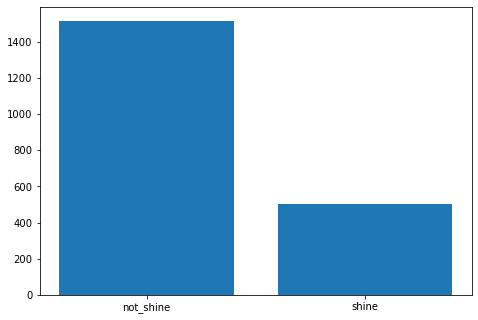

In [8]:
#Save shine images amount & not shine images amount to variable for future use
shine_amount = counter['shine']
not_shine_amount = counter['not_shine']

# Plot a bar chart to check whether data is balance or not
print(counter)
labels = np.unique(data['label'])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = labels
weathers = [not_shine_amount,shine_amount]
ax.bar(langs,weathers)
plt.show()

In [9]:
# Load data & label to X,y
X = np.array(data['data']) # For Data(Images)
y = np.array(data['label']) # Label(Shine, Not Shine)

In [10]:
# Reshape X so that it can fit the dimension and used for Oversampling.
print('Before Reshape:', X.shape)

X = X.reshape(len(data['data']), 100 * 100 * 3)
print('After Reshape:', X.shape)

Before Reshape: (2016, 100, 100, 3)
After Reshape: (2016, 30000)


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.2)

Before Sampling: [('not_shine', 1215), ('shine', 397)]
After Sampling (ROS): [('not_shine', 1215), ('shine', 1215)]
After Sampling (SMOTE): [('not_shine', 1215), ('shine', 1215)]
After Sampling (RUS): [('not_shine', 397), ('shine', 397)]
After Sampling (CC): [('not_shine', 397), ('shine', 397)]


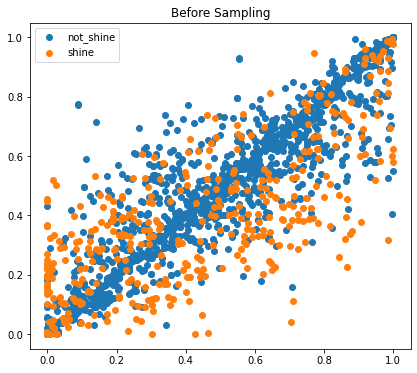

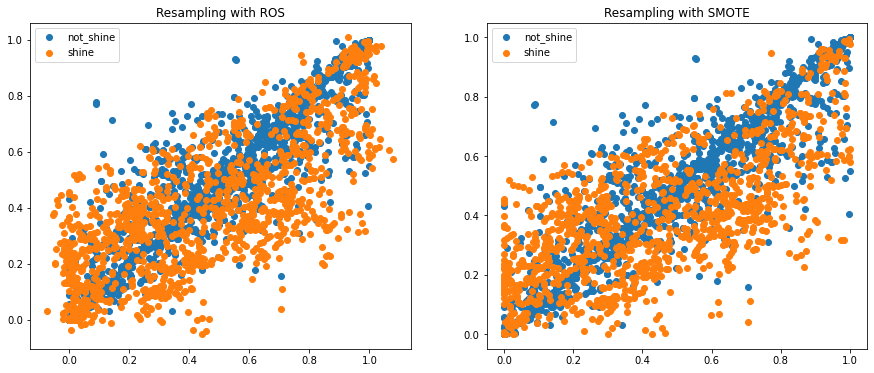

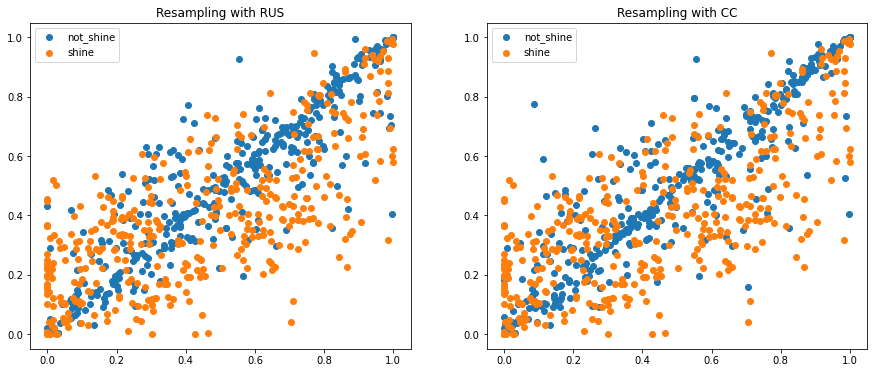

In [12]:
# Oversampling (Random Over Sampling)
# https://stackoverflow.com/questions/71659560/matplotlib-scatter-plot-with-legend-as-string-of-class

plt.figure(figsize = (15,6))
plt.subplot(121)
# Before Sampling
print('Before Sampling:', sorted(Counter(y_train).items()))
# scatter plot of images by class label
for item, image in zip(counter.items(), ['not_shine', 'shine']):
	row_ix = where(y_train == item[0])[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=image)
plt.title('Before Sampling')
plt.legend()

plt.figure(figsize = (15,6))
plt.subplot(121)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=20, shrinkage=0.1)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print('After Sampling (ROS):', sorted(Counter(y_ROS).items()))
for item, image in zip(counter.items(), ['not_shine', 'shine']):
	row_ix = where(y_ROS == item[0])[0]
	plt.scatter(X_ROS[row_ix, 0], X_ROS[row_ix, 1], label=image)
plt.title('Resampling with ROS')
plt.legend()

plt.subplot(122)
# Oversampling (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=20)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)
print('After Sampling (SMOTE):', sorted(Counter(y_SMOTE).items()))
for item, image in zip(counter.items(), ['not_shine', 'shine']):
	row_ix = where(y_SMOTE == item[0])[0]
	plt.scatter(X_SMOTE[row_ix, 0], X_SMOTE[row_ix, 1], label=image)
plt.title('Resampling with SMOTE')
plt.legend()

plt.figure(figsize = (15,6))
plt.subplot(121)
# Undersampling (RandomUnderSampler)
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=20)
X_RUS, y_RUS = rus.fit_resample(X_train, y_train)
print('After Sampling (RUS):', sorted(Counter(y_RUS).items()))
for item, image in zip(counter.items(), ['not_shine', 'shine']):
	row_ix = where(y_RUS == item[0])[0]
	pyplot.scatter(X_RUS[row_ix, 0], X_RUS[row_ix, 1], label=image)
plt.title('Resampling with RUS')
pyplot.legend()

plt.subplot(122)
from imblearn.under_sampling import ClusterCentroids  
cc = ClusterCentroids(random_state=40)
X_CC, y_CC = cc.fit_resample(X_train, y_train)
print('After Sampling (CC):', sorted(Counter(y_CC).items()))
for item, image in zip(counter.items(), ['not_shine', 'shine']):
	row_ix = where(y_CC == item[0])[0]
	pyplot.scatter(X_CC[row_ix, 0], X_CC[row_ix, 1], label=image)
plt.title('Resampling with CC')
pyplot.legend()

plt.show()

In [13]:
import dill
dill.dump_session('handling_imbalance.db')
# dill.load_session('handling_imbalance.db')